<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# ACTRIS DC 
## Comparing timeseries between sites and between years (climatology)

Example script to plot the monthly mean NO2 mass concentration data for 2022 from all ACTRIS stations. Data are plottet as timeseries as well as on a map. Further, the script includes an excample of 15 ywears of data from one site comparing the monthly concentration in 20222 with earlier years


### Import libraries

In [1]:

import xarray as xr
import threddsclient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import netCDF4

### Load data
The data we want to look at are selected from the ACTRIS web portal and a json file with the URLs to their netCDF files are dowloades

In [2]:
# load the basket.json file downloaded from the ACTRIS Data portal
with open('basket.json') as f:
  basket = json.load(f)

# get the list of the urls in the NO2 files in netCDF format
df = pd.DataFrame(basket).T
file_urls = df['opendapUrl'].tolist()
print(file_urls)

['https://thredds.nilu.no/thredds/dodsC/ebas_doi/JE/CK/XJ/JECK-XJ9C.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/XC/VP/A5/XCVP-A5BH.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/3M/9Z/64/3M9Z-648F.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/9K/6S/D6/9K6S-D6A9.nc', 'https://thredds.nilu.no/thredds/dodsC/ebas_doi/DQ/83/EQ/DQ83-EQBE.nc']


In [3]:
# define the variable of interest and the year of interest
variable_interested_standard_name = 'mass_concentration_of_nitrogen_dioxide_expressed_as_nitrogen_in_air'
year_interested = 2022

In [4]:
monthly_means_all_sites = []
site_name_list = []

for i in range(len(file_urls)):
    # open the netCDF file
    data = xr.open_dataset(file_urls[i])

    # check time period of the data
    if (data.time.dt.year == year_interested).any():

        # check if the dataset contains the variable of interest
        for var in data.data_vars:
            if 'standard_name' in data[var].attrs and data[var].attrs['standard_name'] == variable_interested_standard_name:
                print(' File %d, %s, variable: %s %s Period: %s - %s' % (i, data.attrs['ebas_station_code'], "{:<35s}".format(var), "{:<40s}".format('('+data.attrs['ebas_station_name']+')'), data.time.min().values, data.time.max().values))

                # get the variable values for the year of interest
                variable_values = data[var].sel(time = data.time.dt.year == year_interested)

                # calculate the monthly means
                monthly_means = variable_values.groupby('time.month').mean(dim='time')
                monthly_means_all_sites.append(monthly_means)
                site_name_list.append(data.attrs['ebas_station_name'])

                break

    data.close()

 File 0, FI0050R, variable: nitrogen_dioxide_ug_N_per_m3_amean  (Hyytiälä)                               Period: 2018-01-01T00:30:00.000000000 - 2022-12-31T23:30:00.000000000
 File 1, IT0009R, variable: nitrogen_dioxide_ug_N_per_m3_amean  (Monte Cimone)                           Period: 2021-01-01T00:30:00.000000000 - 2022-12-31T23:30:00.000000000
 File 2, CZ0003R, variable: nitrogen_dioxide_ug_N_per_m3        (Kosetice (NAOK))                        Period: 2022-01-01T00:30:00.000000000 - 2022-12-31T23:30:00.000000000
 File 3, FR0020R, variable: nitrogen_dioxide_ug_N_per_m3        (SIRTA Atmospheric Research Observatory) Period: 2022-01-01T00:30:00.000000000 - 2022-12-31T23:30:00.000000000
 File 4, CH0001G, variable: nitrogen_dioxide_ug_N_per_m3        (Jungfraujoch)                           Period: 2021-01-01T00:30:00.000000000 - 2022-12-31T23:30:00.000000000


In [5]:
monthly_means_all_sites

[<xarray.DataArray 'nitrogen_dioxide_ug_N_per_m3_amean' (month: 12)> Size: 96B
 array([0.60432975, 0.79416042, 0.4821442 , 0.21306294, 0.19232715,
        0.27561292, 0.24200906, 0.33898952, 0.31256097, 0.44853801,
        0.74991708, 0.95352256])
 Coordinates:
   * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
 Attributes: (12/57)
     standard_name:                      mass_concentration_of_nitrogen_dioxid...
     units:                              ug/m3
     ancillary_variables:                nitrogen_dioxide_ug N_per_m3_amean_qc...
     cell_methods:                       time: mean
     ebas_data_license:                  https://creativecommons.org/licenses/...
     ebas_revision_date:                 20230424080751
     ...                                 ...
     ebas_framework_description:         ACTRIS is the European Research Infra...
     ebas_framework_contact_name:        Cathrine Lund Myhre, Kjetil Tørseth, ...
     ebas_framework_contact_email:       clm@nil

In [6]:
monthly_means_all_sites

[<xarray.DataArray 'nitrogen_dioxide_ug_N_per_m3_amean' (month: 12)> Size: 96B
 array([0.60432975, 0.79416042, 0.4821442 , 0.21306294, 0.19232715,
        0.27561292, 0.24200906, 0.33898952, 0.31256097, 0.44853801,
        0.74991708, 0.95352256])
 Coordinates:
   * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
 Attributes: (12/57)
     standard_name:                      mass_concentration_of_nitrogen_dioxid...
     units:                              ug/m3
     ancillary_variables:                nitrogen_dioxide_ug N_per_m3_amean_qc...
     cell_methods:                       time: mean
     ebas_data_license:                  https://creativecommons.org/licenses/...
     ebas_revision_date:                 20230424080751
     ...                                 ...
     ebas_framework_description:         ACTRIS is the European Research Infra...
     ebas_framework_contact_name:        Cathrine Lund Myhre, Kjetil Tørseth, ...
     ebas_framework_contact_email:       clm@nil

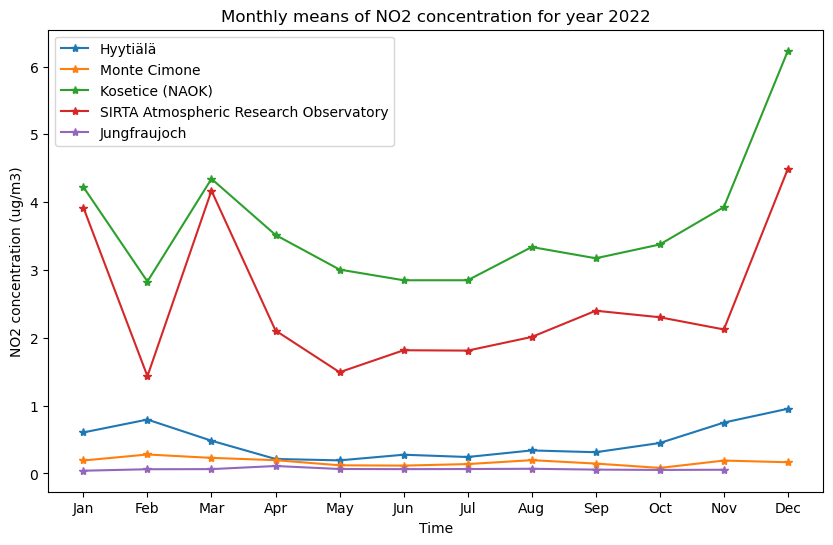

In [7]:

plt.figure(figsize=(10, 6))
for i in range(len(monthly_means_all_sites)):
    plt.plot(monthly_means_all_sites[i], label=site_name_list[i], marker='*')

plt.legend()
plt.xlabel('Time')
plt.ylabel('NO2 concentration (ug/m3)')
plt.title('Monthly means of NO2 concentration for year %d' % year_interested)
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('NO2_monthly_means_multi_sites.png')
plt.show()
plt.close()

In [8]:
import json
import math

# Assuming monthly_means_all_sites is already defined and contains the necessary data
json_data = []

for site in monthly_means_all_sites:
    values = site.values.tolist()  # Convert the DataArray values to a list
    # Replace NaN values with None
    values = [None if math.isnan(value) else value for value in values]

    json_data.append({
        'station': site.attrs['ebas_station_name'],
        'lat': site.attrs['ebas_station_latitude'],
        'lon': site.attrs['ebas_station_longitude'],
        'values': values
    })

# Convert the list of dictionaries to a JSON string
json_string = json.dumps(json_data, indent=4)

# Write the JSON string to a file
with open('datasets/no2_monthly.json', 'w') as json_file:
    json_file.write(json_string)

print("JSON file created")

JSON file created


In [9]:
!python3 -m http.server 8000

Python ble ikke funnet; kj�r uten argumenter for � installere fra Microsoft Store, eller deaktiver denne snarveien fra Innstillinger > Administrer app utf�relses aliaser.


In [10]:
#go to the browser and open the following link

http://0.0.0.0:8000/world_no2.html

SyntaxError: invalid syntax (1832037992.py, line 3)

In [ ]:
# dette er en test på om Wenche klarer å psuhe til github